### Exercise 1: Visualizing the data over time

1. Extract the data and country names from the CSV file as we did in class.
Call the country names `all_countries`.

In [1]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [5]:
download(url, "covid_data.csv")

┌ Error: Download failed: 
└ @ Base download.jl:43


ProcessFailedException: failed process: Process(`'C:\WINDOWS\System32\curl.exe' -s -S -g -L -f -o covid_data.csv https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv`, ProcessExited(6)) [6]


In [45]:
using CSV, Dates, Pipe

In [47]:
data = CSV.read("covid_data.csv");
monitored_dates = names(data)[5:end]

211-element Array{String,1}:
 "1/22/20"
 "1/23/20"
 "1/24/20"
 "1/25/20"
 "1/26/20"
 "1/27/20"
 "1/28/20"
 "1/29/20"
 "1/30/20"
 "1/31/20"
 "2/1/20"
 "2/2/20"
 "2/3/20"
 ⋮
 "8/8/20"
 "8/9/20"
 "8/10/20"
 "8/11/20"
 "8/12/20"
 "8/13/20"
 "8/14/20"
 "8/15/20"
 "8/16/20"
 "8/17/20"
 "8/18/20"
 "8/19/20"

In [4]:
using DataFrames

In [5]:
rename!(data, 1 => "province", 2 => "country");

In [7]:
all_countries = @pipe data[:, :country] |> convert(Vector, _)

266-element Array{String,1}:
 "Afghanistan"
 "Albania"
 "Algeria"
 "Andorra"
 "Angola"
 "Antigua and Barbuda"
 "Argentina"
 "Armenia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 "Australia"
 ⋮
 "United Kingdom"
 "United Kingdom"
 "United Kingdom"
 "Uruguay"
 "Uzbekistan"
 "Venezuela"
 "Vietnam"
 "West Bank and Gaza"
 "Western Sahara"
 "Yemen"
 "Zambia"
 "Zimbabwe"

2. Make a `Vector` called `countries` with a subset of countries that we wish to plot, say China, Japan, South Korea, US, United Kingdom, France, Germany. Be careful to check how they are written in the data set.

In [8]:
countries = ["China", "Japan", "India", "US", "United Kingdom", "Canada", "Germany"]

7-element Array{String,1}:
 "China"
 "Japan"
 "India"
 "US"
 "United Kingdom"
 "Canada"
 "Germany"

3. Define a variable `num_days` by extracting the number of days of data from the dataframe.

In [9]:
num_days = names(data)[5:end] |> length

211

4. We need to accumulate the data for those places that are split up into territories.

* Make a zero vector of the correct length for each country, e.g. using the function `zeros`.

* Loop through all the `countries` and add the corresponding data to that country’s data.

* You may use a dictionary (`Dict`), or a matrix, or a `Vector` containing `Vector`s, or a new `DataFrame` to store the data.

In [10]:
@pipe data[data.country .== "China", 5:end] |> convert(Matrix, _) |> sum(_, dims=1)

1×211 Array{Int64,2}:
 548  643  920  1406  2075  2877  5509  …  89279  89375  89441  89494  89527

In [11]:
countries_data = zeros(Int, length(countries), num_days)

7×211 Array{Int64,2}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0

In [12]:
?@view

```
@view A[inds...]
```

Creates a `SubArray` from an indexing expression. This can only be applied directly to a reference expression (e.g. `@view A[1,2:end]`), and should *not* be used as the target of an assignment (e.g. `@view(A[1,2:end]) = ...`).  See also [`@views`](@ref) to switch an entire block of code to use views for slicing.

# Examples

```jldoctest
julia> A = [1 2; 3 4]
2×2 Array{Int64,2}:
 1  2
 3  4

julia> b = @view A[:, 1]
2-element view(::Array{Int64,2}, :, 1) with eltype Int64:
 1
 3

julia> fill!(b, 0)
2-element view(::Array{Int64,2}, :, 1) with eltype Int64:
 0
 0

julia> A
2×2 Array{Int64,2}:
 0  2
 0  4
```


In [13]:
for (i, country) ∈ enumerate(countries)
    countries_data[i, :] = @pipe (@view data[data.country .== country, 5:end]) |> convert(Matrix, _) |> sum(_, dims=1)
end
countries_data

7×211 Array{Int64,2}:
 548  643  920  1406  2075  2877  5509  …    89375    89441    89494    89527
   2    2    2     2     4     4     7       56074    56717    57636    58728
   0    0    0     0     0     0     0     2647663  2702681  2767253  2836925
   1    1    2     2     5     5     5     5403213  5438325  5482416  5529824
   0    0    0     0     0     0     0      320343   321064   322177   323008
   0    0    0     0     1     1     2  …   124004   124218   125084   125408
   0    0    0     0     0     1     4      225007   226700   228120   229706

5. Plot all countries' data on the same graph by using a `for` loop. To do so, first make an empty plot:

    ```
     p = plot()
    ```

    Then run the loop, adding in the data using `plot!`

    Finally, display the plot by evaluating the plot object `p`. (Just type its name and evaluate.)

In [14]:
using Plots
plot(); # precompile plot function

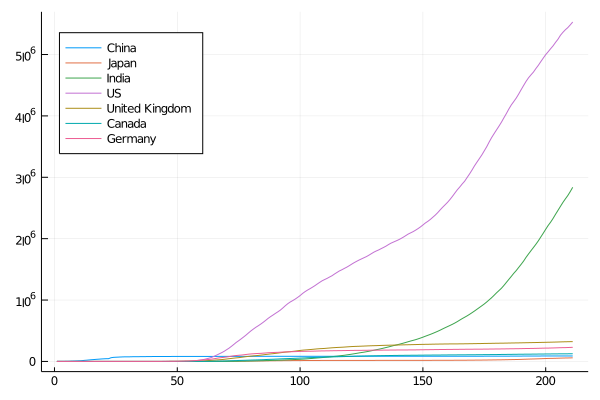

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [15]:
plot()
for (i, country) ∈ enumerate(countries)
    plot!(countries_data[i, :], label=country)
end
plot!(leg=:topleft)

6. Now use a `log` scale on the $y$ axis. In order to do so you will need to convert the vectors to contain `Float64` and replace any 0 values by `NaN` ("not a number") so that `Plots.jl` ignores those values.

    Is there exponential growth?

In [16]:
countries_plot_data = @pipe countries_data |> convert(Array{Float64}, _)

7×211 Array{Float64,2}:
 548.0  643.0  920.0  1406.0  2075.0  …   89494.0         89527.0
   2.0    2.0    2.0     2.0     4.0      57636.0         58728.0
   0.0    0.0    0.0     0.0     0.0          2.76725e6       2.83692e6
   1.0    1.0    2.0     2.0     5.0          5.48242e6       5.52982e6
   0.0    0.0    0.0     0.0     0.0     322177.0        323008.0
   0.0    0.0    0.0     0.0     1.0  …  125084.0        125408.0
   0.0    0.0    0.0     0.0     0.0     228120.0        229706.0

In [17]:
for i ∈ 1:(reduce(*, size(countries_plot_data)))
    iszero(@view countries_plot_data[i]) && (countries_plot_data[i] = NaN)
end
countries_plot_data

7×211 Array{Float64,2}:
 548.0  643.0  920.0  1406.0  2075.0  …   89494.0         89527.0
   2.0    2.0    2.0     2.0     4.0      57636.0         58728.0
 NaN    NaN    NaN     NaN     NaN            2.76725e6       2.83692e6
   1.0    1.0    2.0     2.0     5.0          5.48242e6       5.52982e6
 NaN    NaN    NaN     NaN     NaN       322177.0        323008.0
 NaN    NaN    NaN     NaN       1.0  …  125084.0        125408.0
 NaN    NaN    NaN     NaN     NaN       228120.0        229706.0

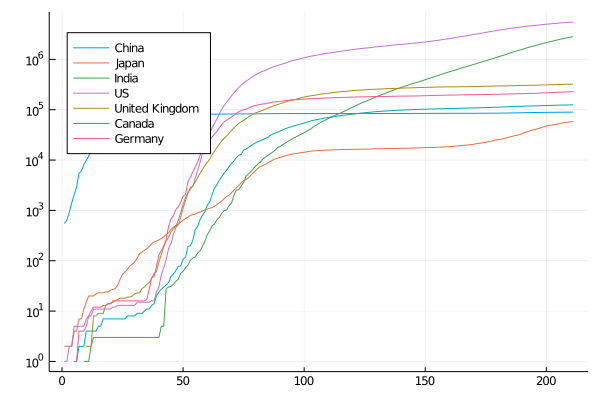

In [18]:
plot()
for (i, country) ∈ enumerate(countries)
    plot!(countries_plot_data[i, :], label=country, yscale=:log10)
end
plot!(leg=:topleft)

7. Turn this into an interactive visualization by adding a slider corresponding to the current day, varying between 1 and the total number of days for which you have data. You should draw only the data up to that particular day. As you move the slider the plot should update. Fix the horizontal axis using the keyword argument `xlim=(0, num_days)` inside the first `plot` command.

In [19]:
using Interact

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-13640860788947679573\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-7116867207330183444\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-13640860788947679573\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

In [23]:
@manipulate for days ∈ 1:num_days
    plot()
    for (i, country) ∈ enumerate(countries)
        plot!(countries_plot_data[i, 1:days], label=country, yscale=:log10)
    end
    plot!(leg=:topleft)
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["days"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 211,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
106, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x000000002a8c1cd0, Task (runnable) @0x000000002a8c1cd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\

### Exercise 2: Visualizing changes

1. Make a data set `total_cases_to_date`, representing for each day the *total* number of confirmed cases during the whole epidemic up until that point.

In [24]:
#! note
NaN + 1

NaN

In [25]:
total_cases_to_date = @pipe sum.(eachcol(data[:, 5:end])) |> vcat(countries_data, _') |> convert(Array{AbstractFloat}, _)

8×211 Array{AbstractFloat,2}:
 548.0  643.0  920.0  1406.0  2075.0  …   89494.0         89527.0
   2.0    2.0    2.0     2.0     4.0      57636.0         58728.0
   0.0    0.0    0.0     0.0     0.0          2.76725e6       2.83692e6
   1.0    1.0    2.0     2.0     5.0          5.48242e6       5.52982e6
   0.0    0.0    0.0     0.0     0.0     322177.0        323008.0
   0.0    0.0    0.0     0.0     1.0  …  125084.0        125408.0
   0.0    0.0    0.0     0.0     0.0     228120.0        229706.0
 555.0  654.0  941.0  1434.0  2118.0          2.2137e7        2.24113e7

2. Make a set of data `new_cases` which is the total number of cases only during the past 7 days.

    You may use the `sum` function.

In [26]:
total_new_cases = total_cases_to_date[end, :] - [zeros(Int, 7)..., total_cases_to_date[end, 1:end-7]...]

211-element Array{Float64,1}:
   555.0
   654.0
   941.0
  1434.0
  2118.0
  2927.0
  5578.0
  5611.0
  7580.0
  8986.0
 10604.0
 14669.0
 16960.0
     ⋮
     1.786889e6
     1.78196e6
     1.807416e6
     1.803399e6
     1.809187e6
     1.809975e6
     1.833537e6
     1.822193e6
     1.810503e6
     1.792234e6
     1.792766e6
     1.79016e6

In [27]:
new_cases = @pipe total_cases_to_date - hcat(zeros(Int, size(total_cases_to_date, 1), 7), total_cases_to_date[:, 1:end-7]) |> convert(Array{AbstractFloat}, _)
for i ∈ 1:(reduce(*, size(new_cases)))
    iszero(@view new_cases[i]) && (new_cases[i] = NaN)
end
for i ∈ 1:(reduce(*, size(total_cases_to_date)))
    iszero(@view total_cases_to_date[i]) && (total_cases_to_date[i] = NaN)
end

In [28]:
push!(countries, "All")

8-element Array{String,1}:
 "China"
 "Japan"
 "India"
 "US"
 "United Kingdom"
 "Canada"
 "Germany"
 "All"

3. Make the visualization using a slider representing days as in the previous exercise, plotting `total_cases_to_date` on the $x$ axis and `new_cases` on the $y$ axis.

    You need to take care that each vector being plotted has the same length.

In [29]:
@manipulate for days ∈ 1:num_days
    plot()
    for (i, country) ∈ enumerate(countries)
        plot!(total_cases_to_date[i, 1:days], new_cases[i, 1:days], label=country, yscale=:log10, xscale=:log10, color=i)
    end
    plot!(leg=:topleft)
    xlabel!("total_cases_to_date")
    ylabel!("new_cases")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["days"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 211,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
106, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000036c18010, Task (runnable) @0x0000000036c18010), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\

4. Add a dot for each countries current position using the `scatter` function (which otherwise works like `plot`) and annotate the countries' dots using something like

    `annotate!(x, y, text(country_name, 10, :black))`

    where `x` and `y` are the positions at which to annotate and `10` is the font size.

In [39]:
function custom_plot!(days)
    for (i, country) ∈ enumerate(countries)
        plot!(total_cases_to_date[i, 1:days], new_cases[i, 1:days], label=country, yscale=:log10, xscale=:log10, color=i)
        x, y = total_cases_to_date[i, days], new_cases[i, days]
        scatter!([x], [y], label="", color=i, markersize=2.5)
        annotate!(x, y, country, 8)
    end
end

custom_plot! (generic function with 1 method)

In [40]:
@manipulate for days ∈ 1:num_days
    plot()
    custom_plot!(days)
    plot!(leg=:topleft)
    xlabel!("total_cases_to_date")
    ylabel!("new_cases")
end

Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Scope(Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :label), Any["days"], Dict{Symbol,Any}(:className => "interact ",:style => Dict{Any,Any}(:padding => "5px 10px 0px 10px")))], Dict{Symbol,Any}(:className => "interact-flex-row-left")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :input), Any[], Dict{Symbol,Any}(:max => 211,:min => 1,:attributes => Dict{Any,Any}(:type => "range",Symbol("data-bind") => "numericValue: index, valueUpdate: 'input', event: {change: function (){this.changes(this.changes()+1)}}","orient" => "horizontal"),:step => 1,:className => "slider slider is-fullwidth",:style => Dict{Any,Any}()))], Dict{Symbol,Any}(:className => "interact-flex-row-center")), Node{WebIO.DOM}(WebIO.DOM(:html, :div), Any[Node{WebIO.DOM}(WebIO.DOM(:html, :p), Any[], Dict{Symbol,Any}(:attributes => Dict("data-bind" => "text: formatted_val")))], Dict{Symbol,Any}(:className => "interact-flex-row-right"))], Dict{Symbol,Any}(:className => "interact-flex-row interact-widget")), Dict{String,Tuple{Observables.AbstractObservable,Union{Nothing, Bool}}}("changes" => (Observable{Int64} with 1 listeners. Value:
0, nothing),"index" => (Observable{Int64} with 2 listeners. Value:
106, nothing)), Set(String[]), nothing, Asset[Asset("js", "knockout", "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout.js"), Asset("js", "knockout_punches", "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Knockout\\IP1uR\\src\\..\\assets\\knockout_punches.js"), Asset("js", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\all.js"), Asset("css", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\InteractBase\\sOe2Z\\src\\..\\assets\\style.css"), Asset("css", nothing, "C:\\Users\\akshu\\.juliapro\\JuliaPro_v1.4.1-1\\packages\\Interact\\SbgIk\\src\\..\\assets\\bulma_confined.min.css")], Dict{Any,Any}("changes" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"changes\"]()) ? (this.valueFromJulia[\"changes\"]=true, this.model[\"changes\"](val)) : undefined})")],"index" => Any[WebIO.JSString("(function (val){return (val!=this.model[\"index\"]()) ? (this.valueFromJulia[\"index\"]=true, this.model[\"index\"](val)) : undefined})")]), WebIO.ConnectionPool(Channel{Any}(sz_max:32,sz_curr:0), Set(AbstractConnection[]), Base.GenericCondition{Base.AlwaysLockedST}(Base.InvasiveLinkedList{Task}(Task (runnable) @0x0000000013ca9cd0, Task (runnable) @0x0000000013ca9cd0), Base.AlwaysLockedST(1))), WebIO.JSString[WebIO.JSString("function () {\n    var handler = (function (ko, koPunches) {\n    ko.punches.enableAll();\n    ko.bindingHandlers.numericValue = {\n        init: function(element, valueAccessor, allBindings, data, context) {\n            var stringified = ko.observable(ko.unwrap(valueAccessor()));\n            stringified.subscribe(function(value) {\n                var val = parseFloat(value);\n                if (!isNaN(val)) {\n                    valueAccessor()(val);\n                }\n            });\n            valueAccessor().subscribe(function(value) {\n                var str = JSON.stringify(value);\n                if ((str == \"0\") && ([\"-0\", \"-0.\"].indexOf(stringified()) >= 0))\n                     return;\n                 if ([\"null\", \"\"].indexOf(str) >= 0)\n                     return;\n                stringified(str);\n            });\n            ko.applyBindingsToNode(\n                element,\n                {\n                    value: stringified,\n                    valueUpdate: allBindings.get('valueUpdate'),\n                },\n                context,\n            );\n        }\n    };\n    var json_data = {\"formatted_vals\":[\"1\",\"2\",\"3\",\"4\",\"5\",\"6\",\"7\",\"8\",\"9\",\"10\",\"11\",\"12\

┌ Info: Saved animation to 
│   fn = C:\Users\akshu\Documents\mitx\6S083\problem_sets\tmp.gif
└ @ Plots C:\Users\akshu\.juliapro\JuliaPro_v1.4.1-1\packages\Plots\8GUYs\src\animation.jl:102


Plots.AnimatedGif("C:\\Users\\akshu\\Documents\\mitx\\6S083\\problem_sets\\tmp.gif")
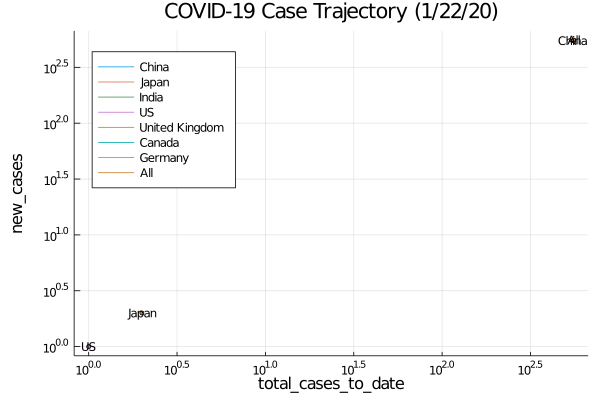

In [50]:
animation = @animate for days ∈ 1:num_days
    plot(title="COVID-19 Case Trajectory (" * monitored_dates[days] * ")",)
    custom_plot!(days)
    plot!(leg=:topleft)
    xlabel!("total_cases_to_date")
    ylabel!("new_cases")
end

gif(animation, fps = 6)